In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data description
'''
Data used in this analysis:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

winequality.names:

A README file stating attribution for authors for using the data set along with attributes of the
data set to include one output variable - 'quality.'

winequality-red.csv and winequality-white.csv:

Data sets are described as follows:

4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

5. Number of Instances: red wine - 1599; white wine - 4898. 

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None

'''


'\nData used in this analysis:\n\nP. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. \n  Modeling wine preferences by data mining from physicochemical properties.\n  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.\n\n  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016\n                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf\n                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib\n\nwinequality.names:\n\nA README file stating attribution for authors for using the data set along with attributes of the\ndata set to include one output variable - \'quality.\'\n\nwinequality-red.csv and winequality-white.csv:\n\nData sets are described as follows:\n\n4. Relevant Information:\n\n   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.\n   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].\n   Due to privacy and logistic 

In [3]:
# Read in the data
red = pd.read_csv('winequality-red.csv', delimiter=';')

In [4]:
# Read in the data
white = pd.read_csv('winequality-white.csv', delimiter=';')

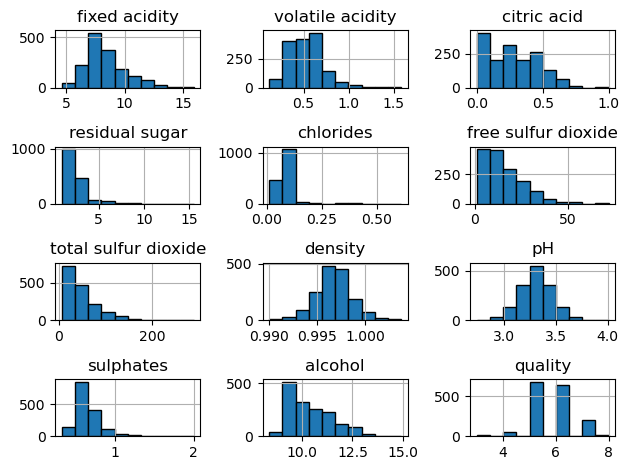

In [5]:
# Frequency distributions
red.hist(edgecolor='black')
plt.tight_layout()

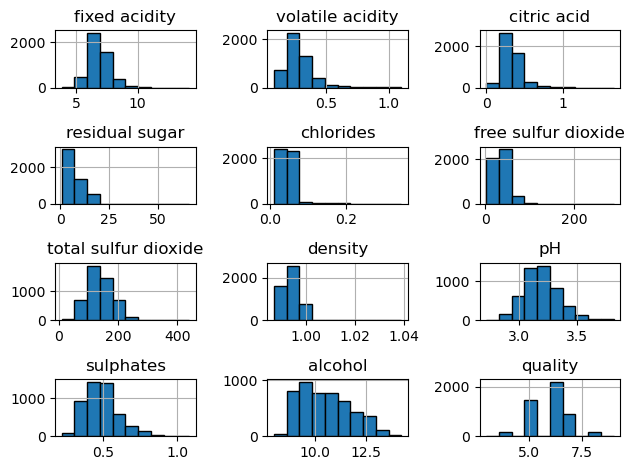

In [6]:
# Frequency distributions
white.hist(edgecolor='black')
plt.tight_layout()

In [7]:
# Perform descriptive stats on red wines
red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

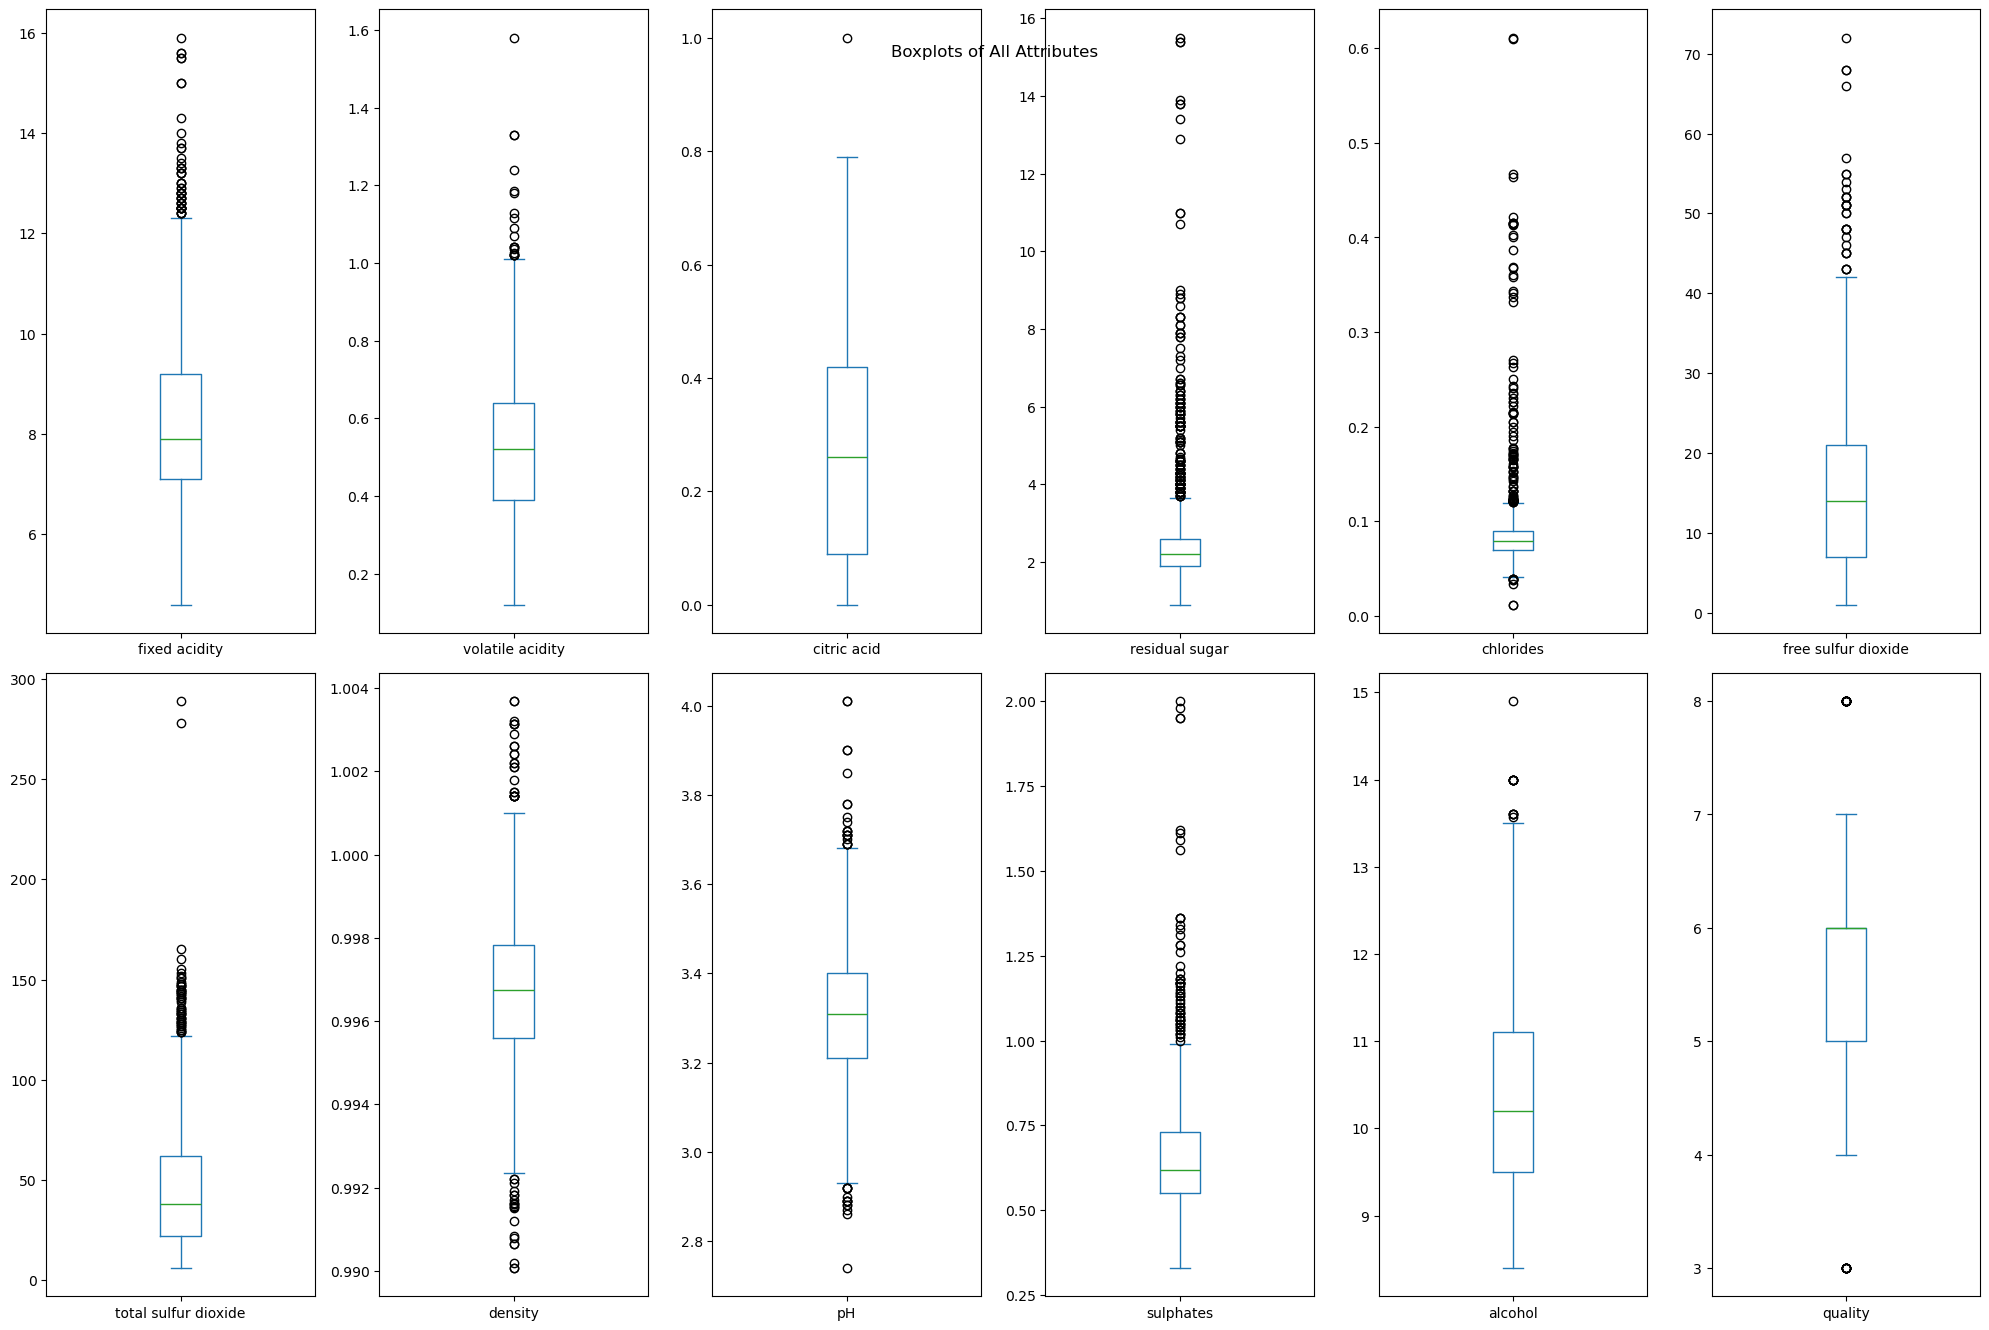

In [8]:
# Boxplots for all attributes of data set - red wines
red.plot(kind='box', subplots=True, layout=(len(red.columns)//2, len(red.columns)//2), figsize=(20, 40), title='Boxplots of All Attributes')
plt.tight_layout()
plt.show()

In [9]:
# Perform descriptive stats on white wines
white.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

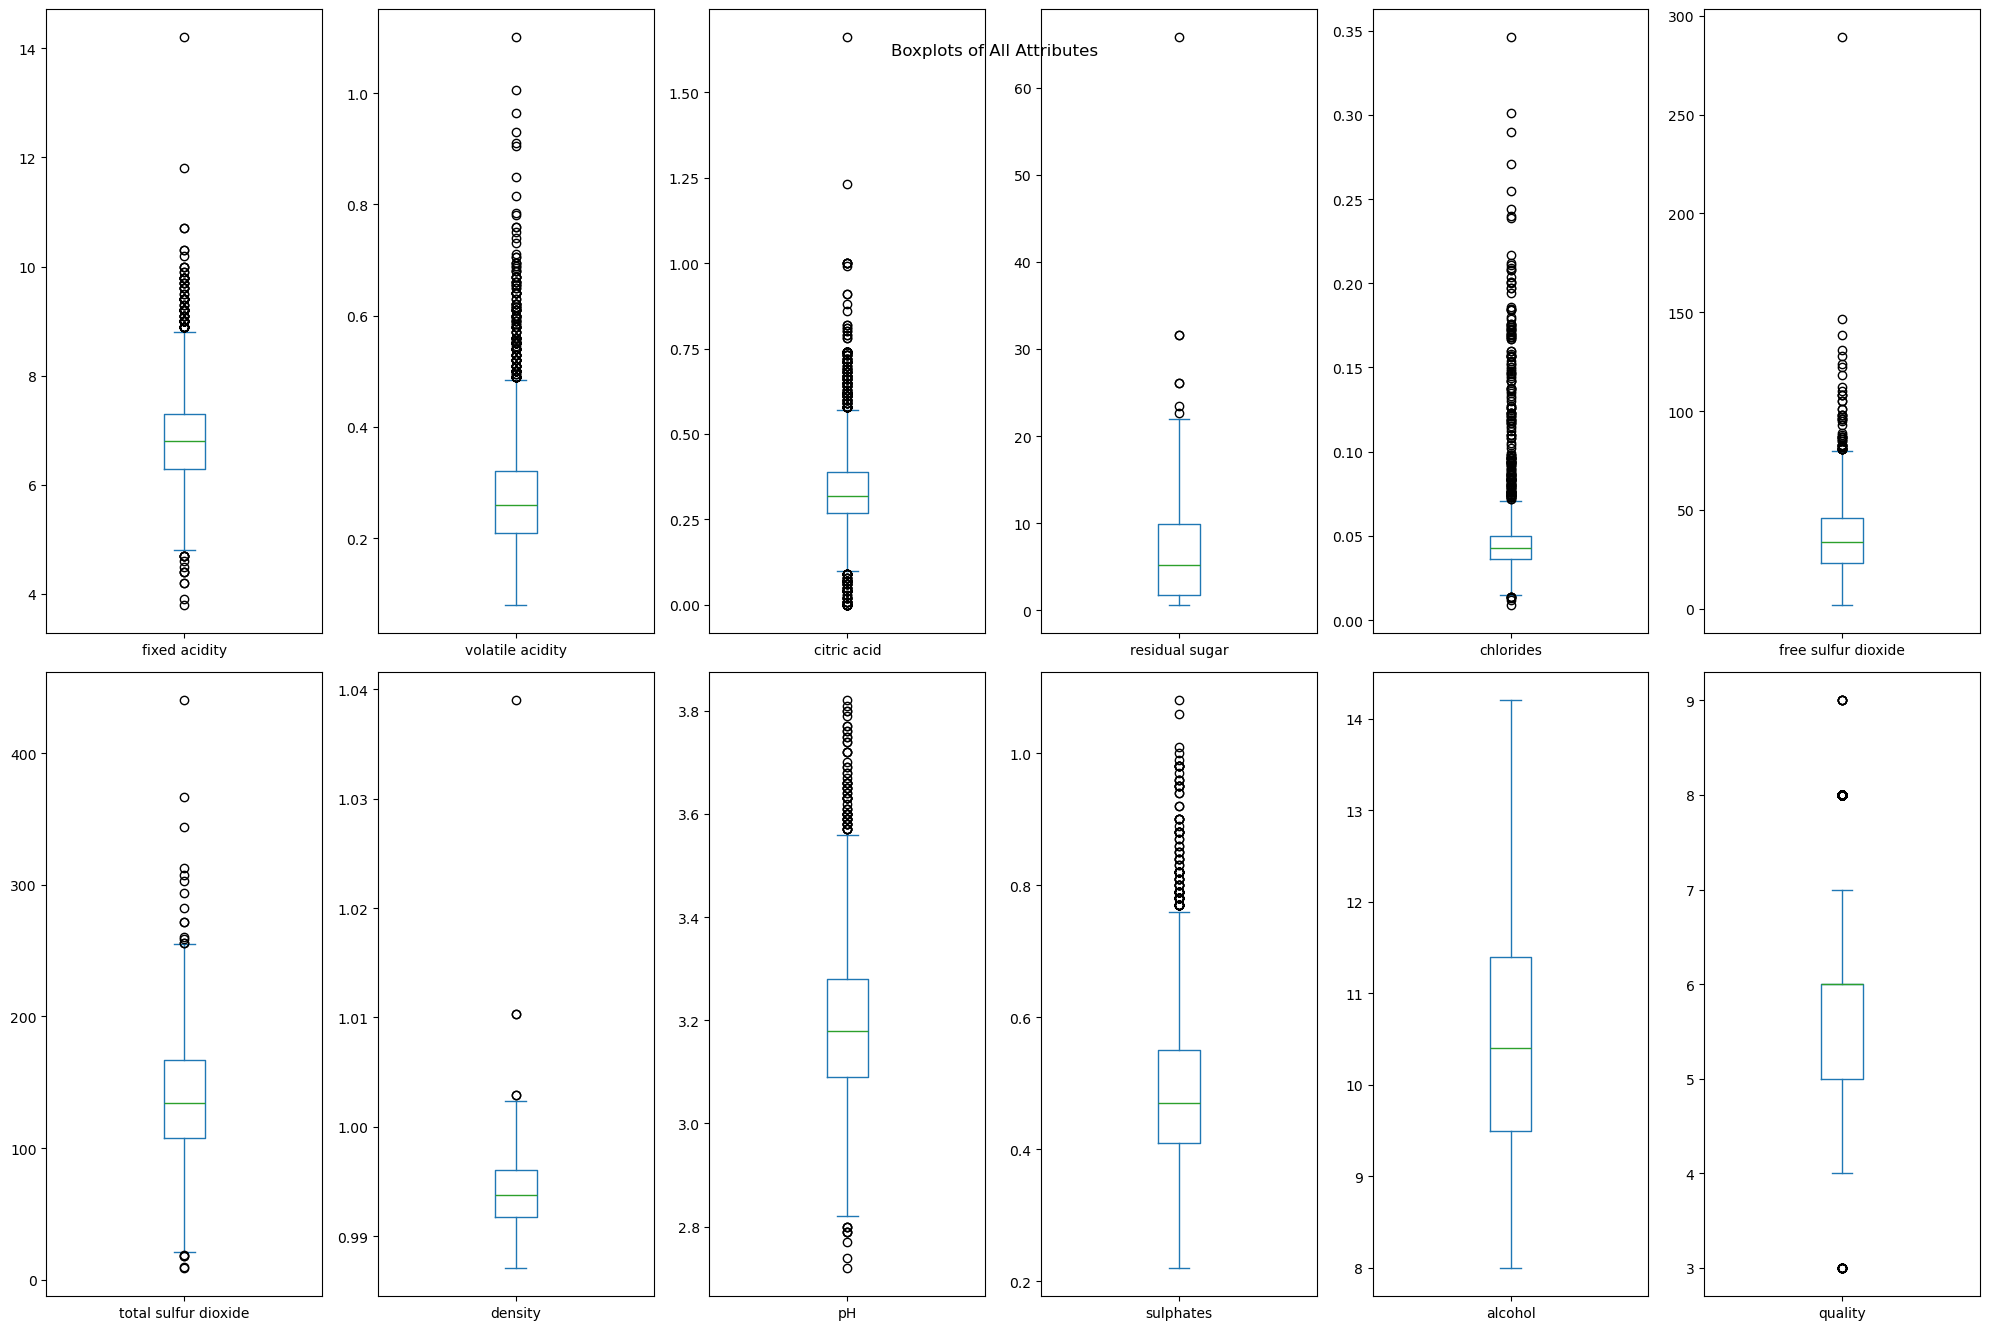

In [10]:
# Boxplots for all attributes of data set - white wines
white.plot(kind='box', subplots=True, layout=(len(white.columns)//2, len(white.columns)//2), figsize=(20, 40), title='Boxplots of All Attributes')
plt.tight_layout()
plt.show()

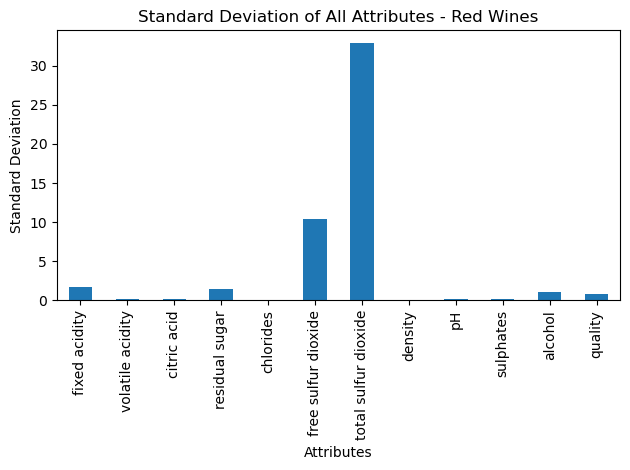

In [11]:
# Perform standard deviation calulations of red wines and plot
std_devs_red = red.std()
std_devs_red.plot(kind='bar', title='Standard Deviation of All Attributes - Red Wines')
plt.xlabel('Attributes')
plt.ylabel('Standard Deviation')
plt.grid(False)
plt.tight_layout()
plt.show()

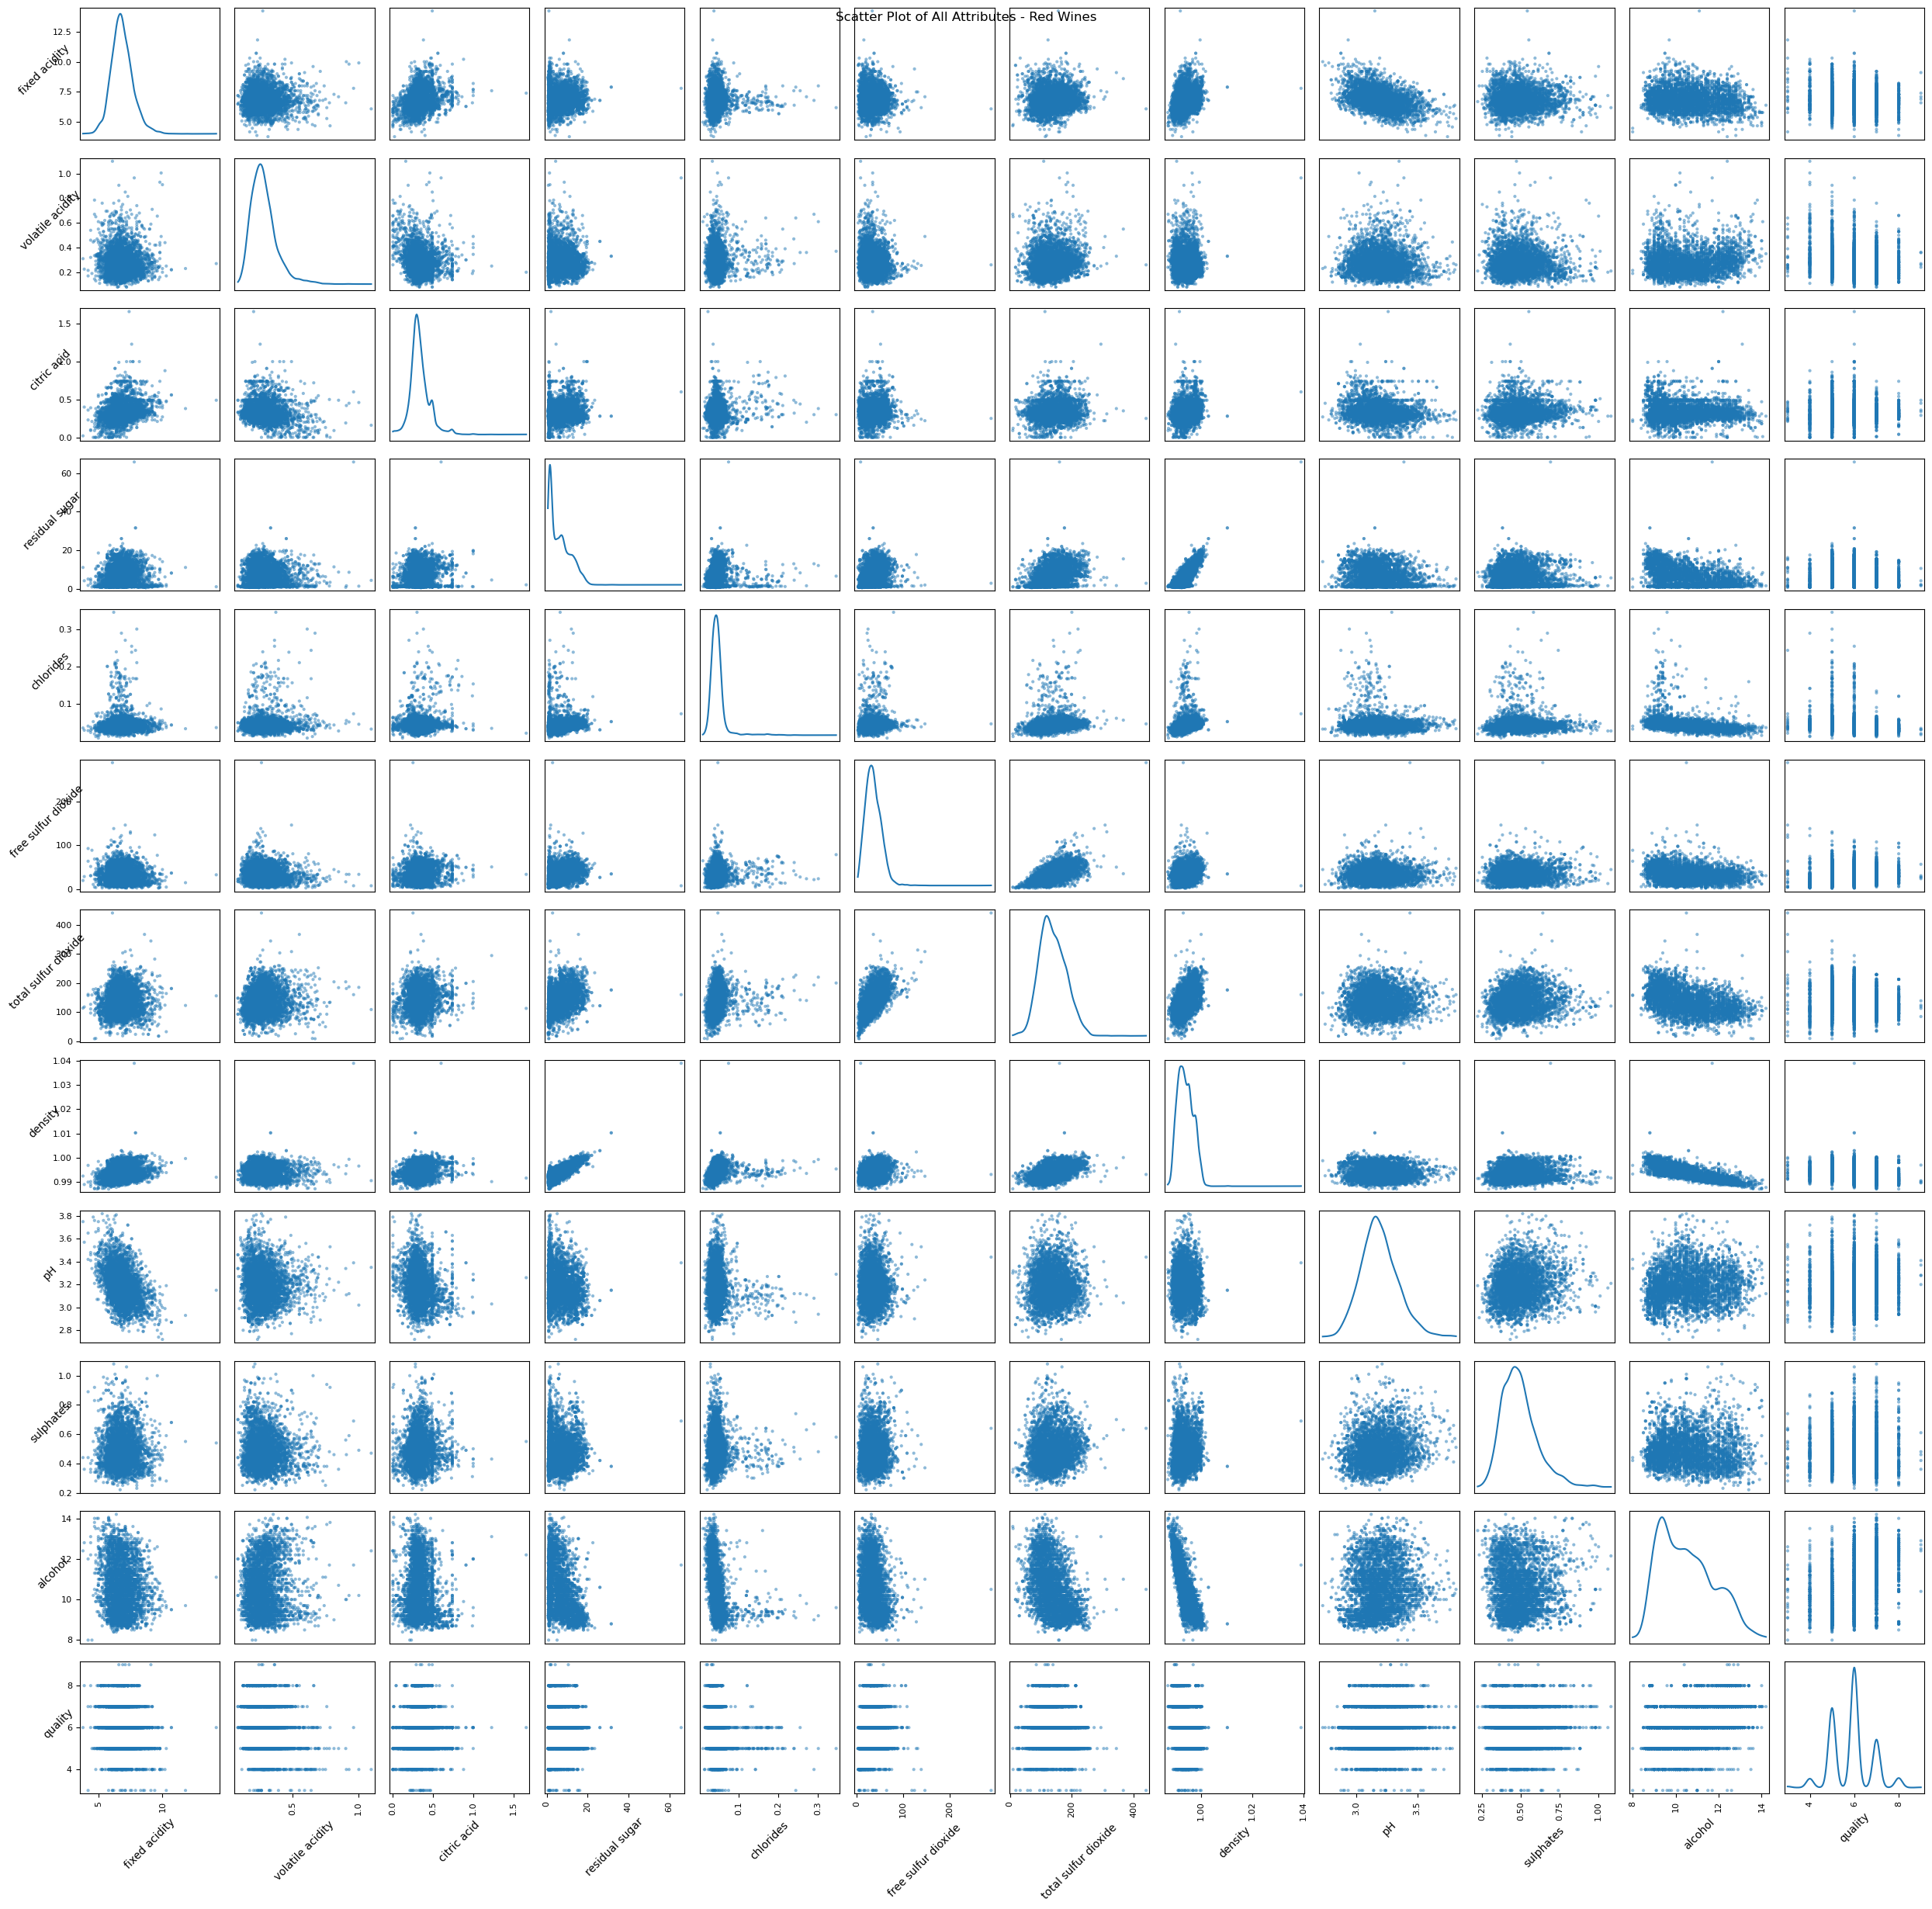

In [12]:
# Create scatter plots for all attributes in the data set - red wines
scatter_matrix_red = pd.plotting.scatter_matrix(white, figsize=(25, 25), diagonal='kde') # Scatter plot matrix
plt.suptitle('Scatter Plot of All Attributes - Red Wines')
for ax in scatter_matrix_red.ravel(): # Rotate axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation=45)
    ax.set_ylabel(ax.get_ylabel(), rotation=45)
plt.tight_layout()
plt.show()

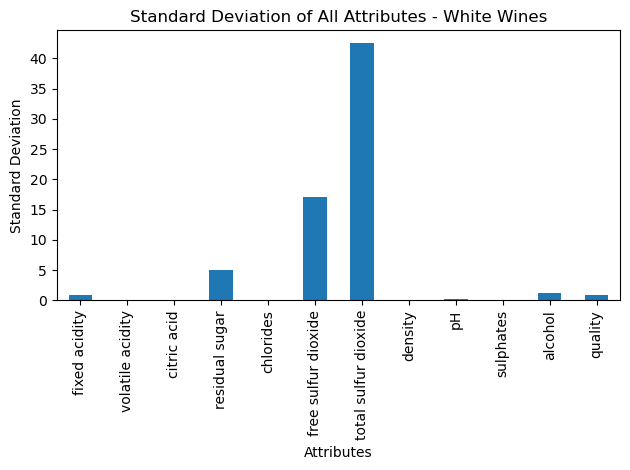

In [13]:
# Perform standard deviation calulations of white wines and plot
std_devs_white = white.std()
std_devs_white.plot(kind='bar', title='Standard Deviation of All Attributes - White Wines')
plt.xlabel('Attributes')
plt.ylabel('Standard Deviation')
plt.grid(False)
plt.tight_layout()
plt.show()

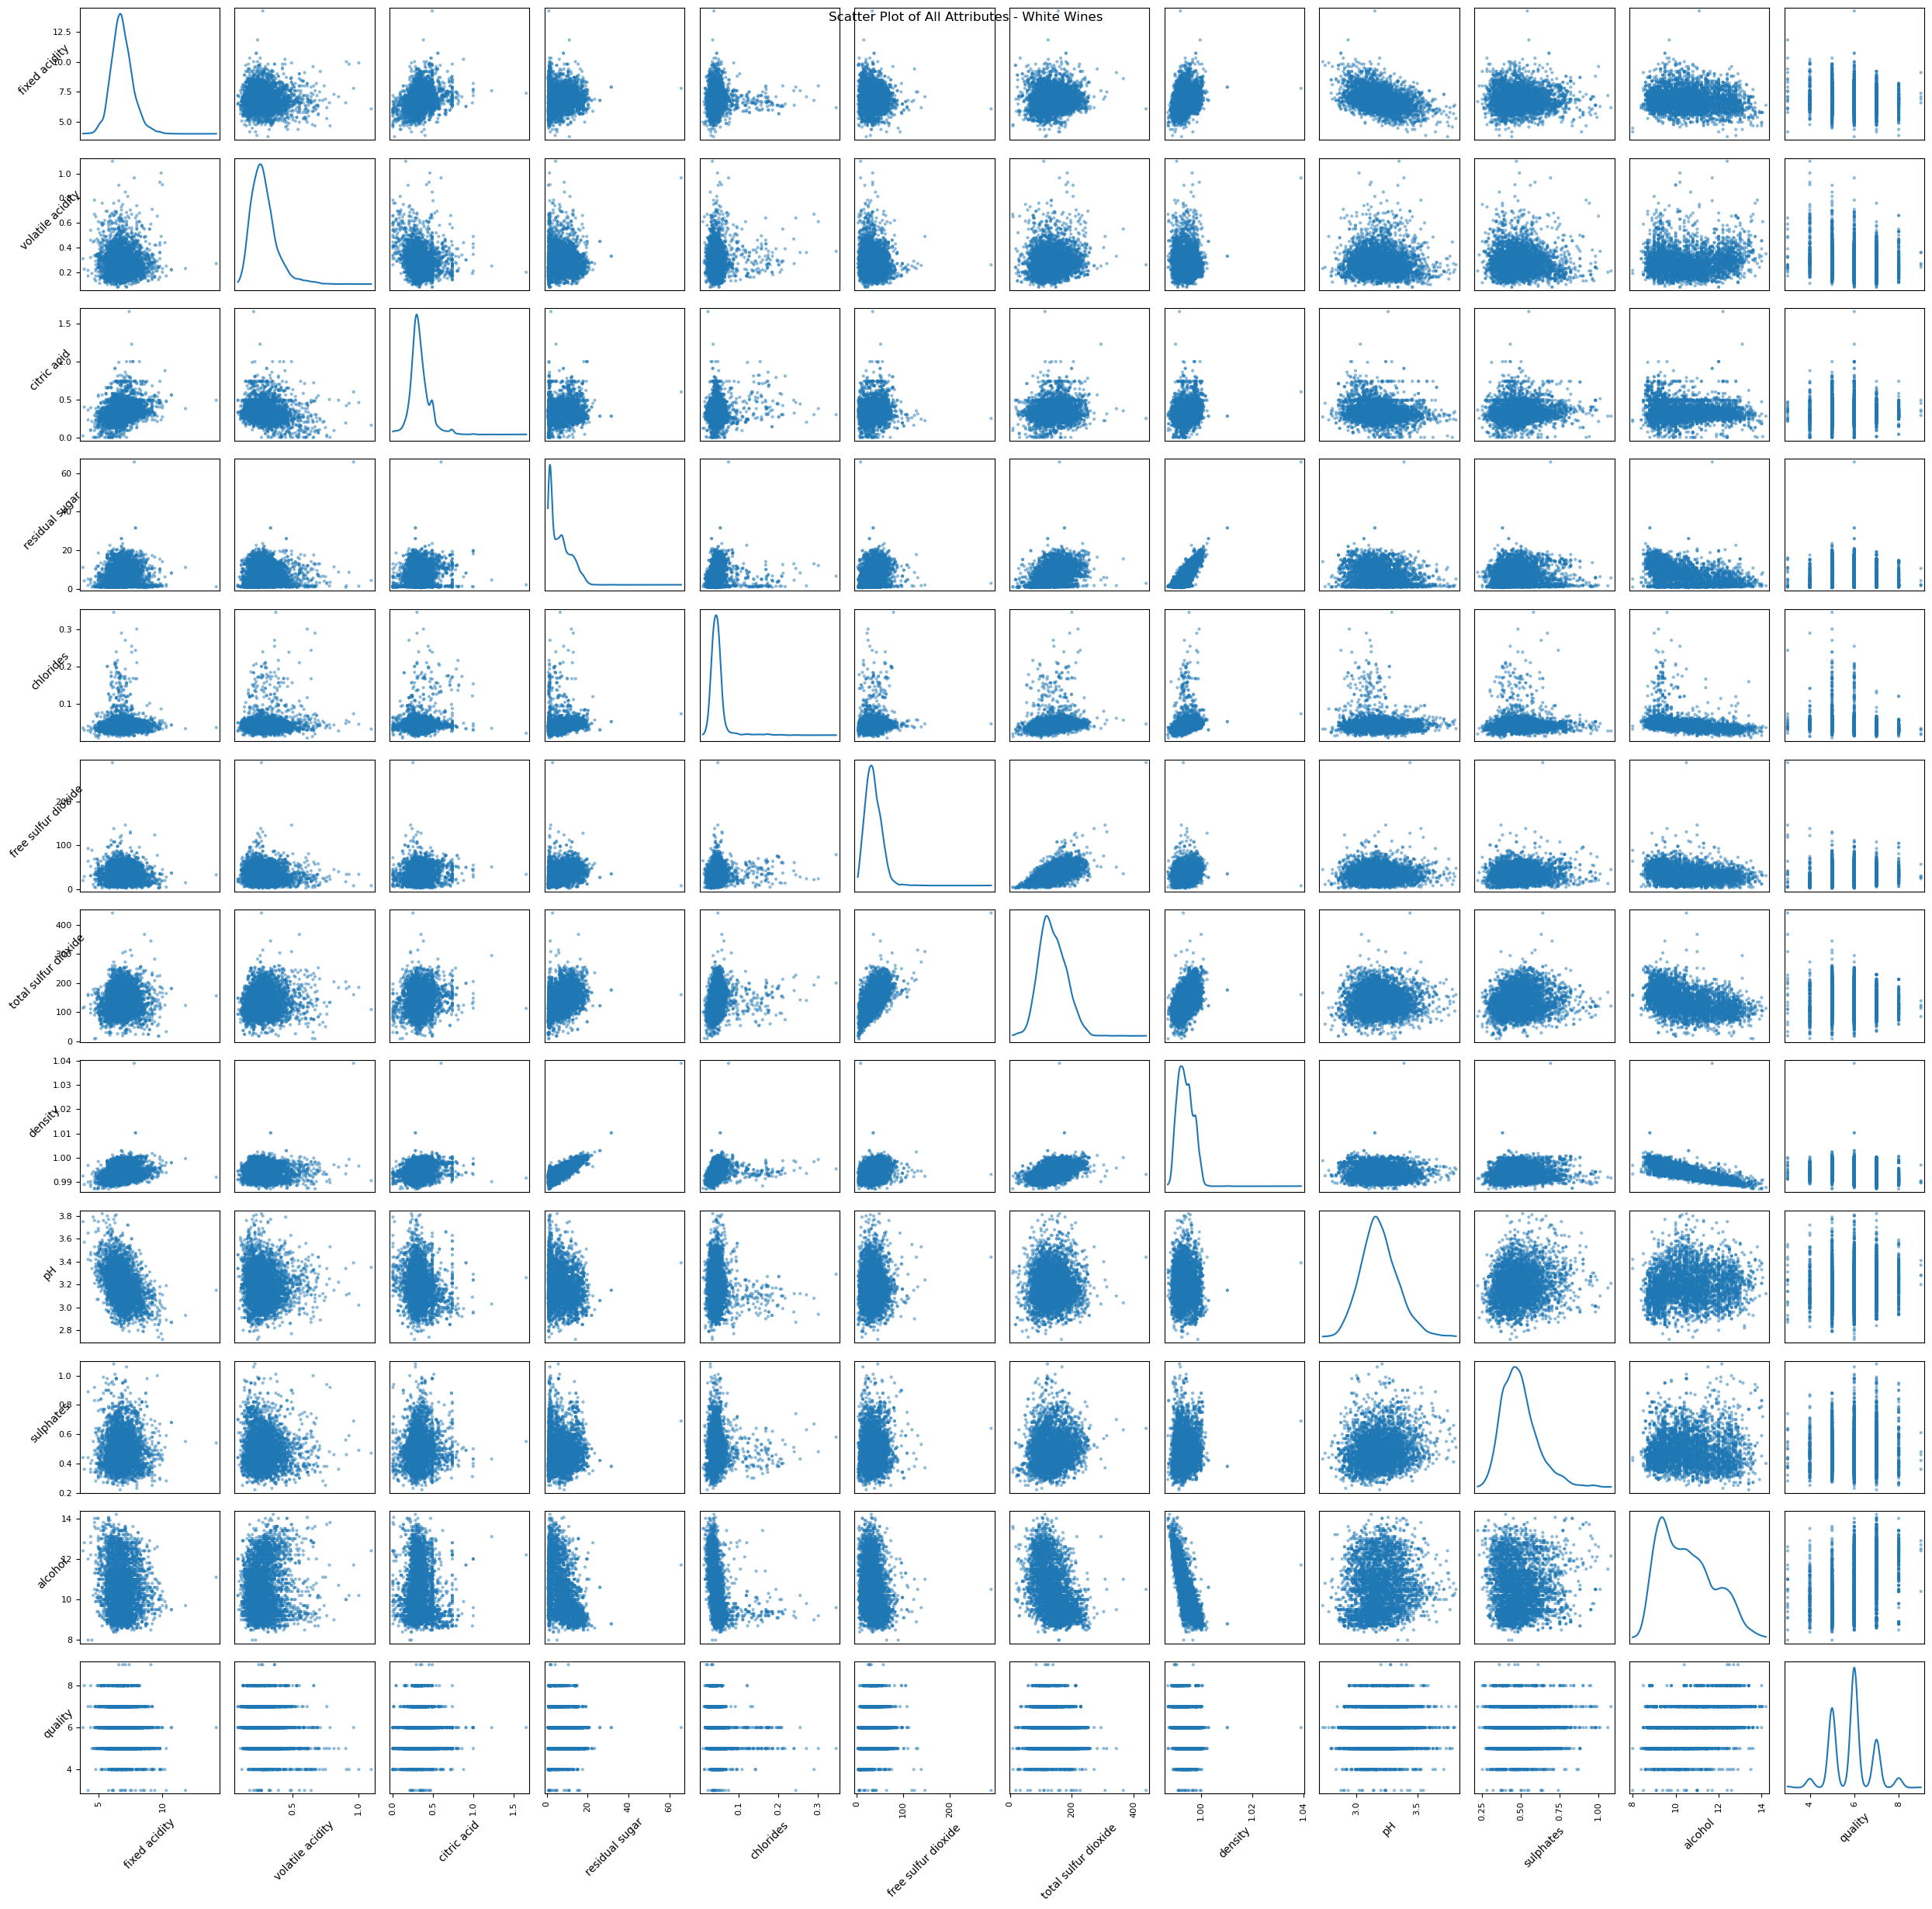

In [14]:
# Create scatter plots for all attributes in the data set - white wines
scatter_matrix_white = pd.plotting.scatter_matrix(white, figsize=(25, 25), diagonal='kde') # Scatter plot matrix
plt.suptitle('Scatter Plot of All Attributes - White Wines')
for ax in scatter_matrix_white.ravel(): # Rotate axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation=45)
    ax.set_ylabel(ax.get_ylabel(), rotation=45)
plt.tight_layout()
plt.show()

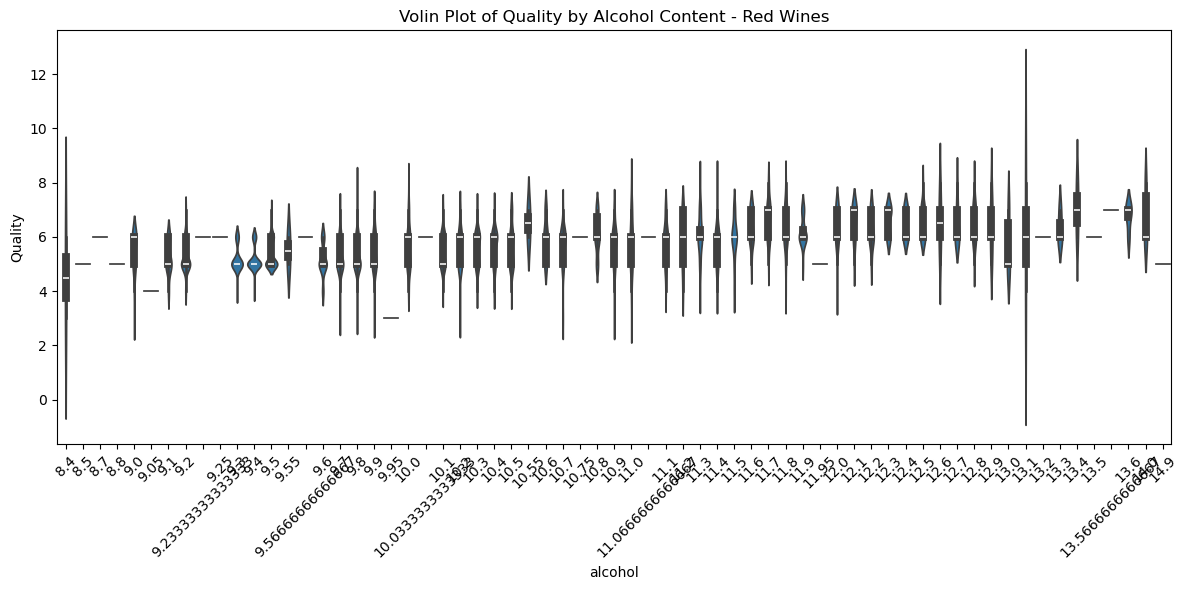

In [15]:
import seaborn as sns
# Create violin plot to see the relationship between all attributes and the response variable 'quality.'
fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(x='alcohol', y='quality', data=red)
plt.title('Volin Plot of Quality by Alcohol Content - Red Wines')
plt.xlabel('alcohol')
plt.xticks(rotation=45) # Rotate x axis labels
plt.ylabel('Quality')
plt.tight_layout()
plt.show()



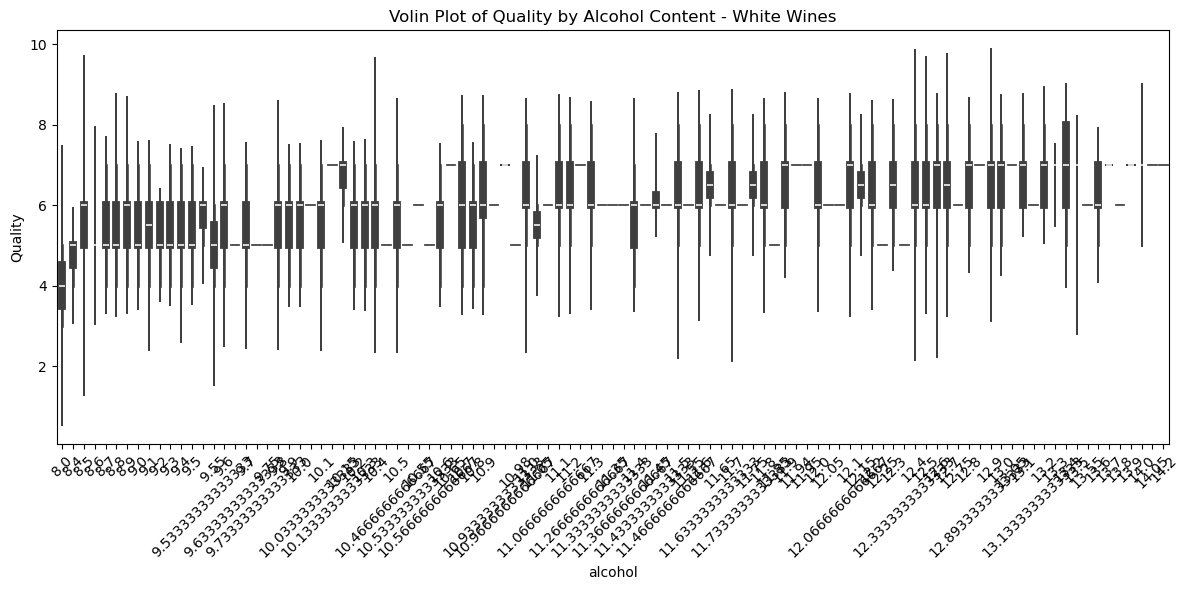

In [16]:
import seaborn as sns
# Create violin plot to see the relationship between all attributes and the response variable 'quality.'
fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(x='alcohol', y='quality', data=white)
plt.title('Volin Plot of Quality by Alcohol Content - White Wines')
plt.xlabel('alcohol')
plt.xticks(rotation=45) # Rotate x axis labels
plt.ylabel('Quality')
plt.tight_layout()
plt.show()

In [55]:
# Compare means of most influential factors (Sulphates, Alcohol, Total Sulfur Dioxide)
import scipy.stats as stats
# Two sample t-test - alcohol
sig_test = stats.ttest_ind(red['alcohol'], white['alcohol'])
sig_test.pvalue

# Two sample t-test sulphates
sig_test = stats.ttest_ind(red['sulphates'], white['sulphates'])
sig_test.pvalue

# Two sample t-test - total sulfur dioxide
sig_test = stats.ttest_ind(red['total sulfur dioxide'], white['total sulfur dioxide'])
sig_test.pvalue
print(sig_test.confidence_interval(),
white['total sulfur dioxide'].mean())

ConfidenceInterval(low=-94.17096988414505, high=-89.61476019776865) 138.36065741118824


In [65]:
# Correlated factors without response variable
red_factors = red.drop('quality', axis=1)
white_factors = white.drop('quality', axis=1)

red_factors.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   

                       alcohol  
fixed acidity        -0.061668  
volatile acidity     -0.202288  
citric acid           0.109903  
residual sugar        0.042075  
chlorides            -0.221141  
free sulfur dioxide  -0.069408  
total sulfur dioxide -0.205654  
density              -0.496180  
pH                    0.205633  
sulphates             0.093595  
alcohol               1.000000

In [69]:
white_factors.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.089021   0.023086            -0.049396   
volatile acidity            0.064286   0.070512            -0.097012   
citric acid                 0.094212   0.114364             0.094077   
residual sugar              1.000000   0.088685             0.299098   
chlorides                   0.088685   1.000000             0.101392   
free sulfur dioxide         0.299098   0.101392             1.000000   
total sulfur dioxide        0.401439   0.198910             0.615501   
density                     0.838966   0.257211             0.294210   
pH                         -0.194133  -0.090439            -0.000618   
sulphates                  -0.026664   0.016763             0.059217   
alcohol                    -0.450631  -0.360189            -0.250104   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.091070  0.265331 -0.425858  -0.017143   
volatile acidity                  0.089261  0.027114 -0.031915  -0.035728   
citric acid                       0.121131  0.149503 -0.163748   0.062331   
residual sugar                    0.401439  0.838966 -0.194133  -0.026664   
chlorides                         0.198910  0.257211 -0.090439   0.016763   
free sulfur dioxide               0.615501  0.294210 -0.000618   0.059217   
total sulfur dioxide              1.000000  0.529881  0.002321   0.134562   
density                           0.529881  1.000000 -0.093591   0.074493   
pH                                0.002321 -0.093591  1.000000   0.155951   
sulphates                         0.134562  0.074493  0.155951   1.000000   
alcohol                          -0.448892 -0.780138  0.121432  -0.017433   

                       alcohol  
fixed acidity        -0.120881  
volatile acidity      0.067718  
citric acid          -0.075729  
residual sugar       -0.450631  
chlorides            -0.360189  
free sulfur dioxide  -0.250104  
total sulfur dioxide -0.448892  
density              -0.780138  
pH                    0.121432  
sulphates            -0.017433  
alcohol               1.000000